In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv("csv .Insurance.csv")
df

,Age,Vaccinated
0,18,0
1,20,0
2,25,0
3,23,0
4,19,0
5,26,0
6,29,0
7,35,1
8,42,1
9,32,1


In [22]:
df.shape

(30, 2)

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30.0,44.3,26.479856,18.0,25.0,31.5,59.0,110.0
Vaccinated,30.0,0.5,0.508548,0.0,0.0,0.5,1.0,1.0


In [24]:
x = df.iloc[:,0:1].values
x

array([[ 18],
       [ 20],
       [ 25],
       [ 23],
       [ 19],
       [ 26],
       [ 29],
       [ 35],
       [ 42],
       [ 32],
       [ 43],
       [ 55],
       [ 60],
       [ 30],
       [ 28],
       [ 31],
       [ 56],
       [ 69],
       [ 90],
       [ 85],
       [ 64],
       [ 78],
       [ 99],
       [110],
       [ 49],
       [ 20],
       [ 18],
       [ 25],
       [ 28],
       [ 22]], dtype=int64)

In [25]:
y = df.iloc[:,1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
df.dtypes

Age           int64
Vaccinated    int64
dtype: object

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [28]:
x_train

array([[18],
       [19],
       [56],
       [26],
       [30],
       [55],
       [99],
       [20],
       [25],
       [20],
       [23],
       [78],
       [18],
       [90],
       [22],
       [64],
       [35],
       [43],
       [28],
       [85],
       [29]], dtype=int64)

In [29]:
x_test

array([[ 25],
       [ 31],
       [110],
       [ 69],
       [ 42],
       [ 32],
       [ 28],
       [ 49],
       [ 60]], dtype=int64)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
Classifier = KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p=2)

In [34]:
Classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [35]:
y_predict = df = Classifier.predict(x_test)
y_predict

array([0, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [36]:
y_test

array([0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [37]:
Classifier.score(x_test,y_test)

0.8888888888888888

In [46]:
from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(y_test,y_predict)

In [47]:
c_mat

array([[3, 0],
       [1, 5]], dtype=int64)

# c_mat works as calculating error as like matrix

# FOR EX. 1+0 = 1 we hv only one wrong as we can see above while   

# comparing y_predict and y_test

In [48]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_predict)

In [49]:
acc_score

0.8888888888888888

# let us check probability

In [51]:
Classifier.predict_proba(x_test)

array([[1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ]])

# shows the probability of x_test as like for first column as 100% no 0% yes as same for rest 

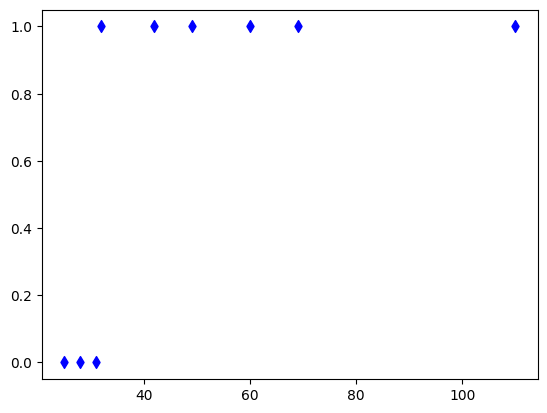

In [54]:
plt.scatter(x_test,y_test,color="b",marker = "d")

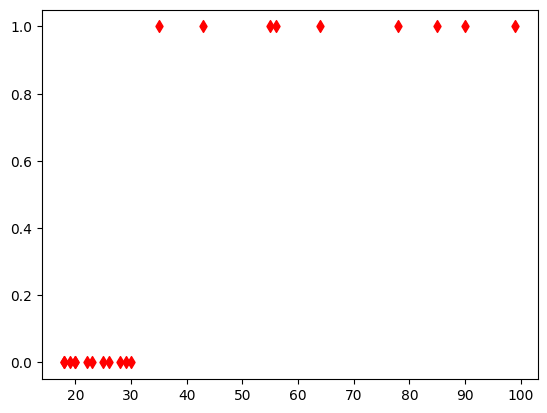

In [56]:
plt.scatter(x_train,y_train,color="r",marker = "d")

In [57]:
Classifier.predict_proba(x_train)

array([[1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ]])

In [59]:
Classifier.score(x_train,y_train)

0.9523809523809523

# If we had large datasets so importing confusion matric leads to count how many r incorrect prediction r there 